In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 

In [ ]:
batch_size = 64 
epochs = 100 
latent_dim = 256  
num_samples = 2000  

In [ ]:
# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()

In [ ]:
sample = open(r"\Path to data") 
s = sample.read() 

# Replaces escape character with space 
f = s.split('\n')

In [ ]:
print(len(s))
print(len(f))

194439
1879


In [ ]:
for line in f:
  line = 'start'+line+'end'

In [ ]:
input_texts = [] 
for line in f:
    line = line.replace('.'," ",2)
    line = line.replace('?'," ",1)
    line = 'start'+' '+line+'end'
    print(sent_tokenize(line))
    for i in sent_tokenize(line):
        print(i)
        temp = [] 
### tokenize the sentence into words 
        for j in word_tokenize(i): 
            temp.append(j.lower()) 
            print(temp)
        input_texts.append(temp)         
# input_texts.append(' ')

Streaming output truncated to the last 5000 lines.
['start', 'find', 'the', 'reciprocal', 'of', '(', '-1/2', ')', '(', '8/4', ')', '(', '12']
['start', 'find', 'the', 'reciprocal', 'of', '(', '-1/2', ')', '(', '8/4', ')', '(', '12', ')']
['start', 'find', 'the', 'reciprocal', 'of', '(', '-1/2', ')', '(', '8/4', ')', '(', '12', ')', 'end']
['start What is the sum of the consecutive integers from 15 to 55 (inclusive) end']
start What is the sum of the consecutive integers from 15 to 55 (inclusive) end
['start']
['start', 'what']
['start', 'what', 'is']
['start', 'what', 'is', 'the']
['start', 'what', 'is', 'the', 'sum']
['start', 'what', 'is', 'the', 'sum', 'of']
['start', 'what', 'is', 'the', 'sum', 'of', 'the']
['start', 'what', 'is', 'the', 'sum', 'of', 'the', 'consecutive']
['start', 'what', 'is', 'the', 'sum', 'of', 'the', 'consecutive', 'integers']
['start', 'what', 'is', 'the', 'sum', 'of', 'the', 'consecutive', 'integers', 'from']
['start', 'what', 'is', 'the', 'sum', 'of', 'the'

In [ ]:
print(len(input_texts))
print(len(input_characters))

1914
0


In [ ]:
for i in range(len(input_texts)):
    for char in input_texts[i]:
        if char not in input_characters:
            input_characters.add(char)

In [ ]:
print(len(input_characters))

1368


In [ ]:
max_encoder_seq_length = max([len(txt) for txt in input_texts])

In [ ]:
print(input_characters)

{'105end', 'digitsend', 'out', 'equally', 'b', 'arithmetic', '-6end', '0end', 'amount', '33end', '0,1,2,3,4,5,6,7,8', 'pend', 'satisfy', '<', '-41', '126end', '315end', '/g', '5/18', '0.1', '5^21', 'increases', '108', 'could', 'one-sixth', 'lesserend', '24', '207end', '61end', '128', '825', '-100', 'p', '149', 'bx', '123end', '-223', 'd', 'repetition', 'fourthend', '4p-5', 'part', 'reversal.end', '140', '44', '13/6', 'then', '10', 'eighteen', 'thirty-nineend', 'xend', '227', 'ounces', 'six-digit', '69', 'eighty-four', 'up', '2pq=8', 'did', 'lower', 'fifty-seven', 'ten.the', 'function', 'smallerend', '1/2', 'reduced', '87', 'a.end', 'eleven', '��', 'whose', '394', '218end', 'sisters', '493', 'list', 'f=4', '1524', 'had', 'odd.c', '804end', '99end', 'on', 'give', 'resulting', '31', 'after', '180', 'thirdend', 'of.end', 'below', 'mean', 'be.end', '4/5', '148end', 'post', '-63', 'fourteenend', 'exchanged', 'mystery', '-81', "'s", '7/12', 'eight-digit', 'system', 'larger', 'counting', '^32'

In [ ]:
print('Number of samples:', len(input_texts))

Number of samples: 1914


In [ ]:
input_characters = sorted(list(input_characters))
num_encoder_tokens = len(input_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])

In [ ]:
print(max_encoder_seq_length)

83


In [ ]:
sample = open(r"eqndevdata try1", "r") 
s = sample.read() 

# Replaces escape character with space 
f = s.split('\n')

In [ ]:
print(f[:5])

['equ: x=y+11, equ: 3*x=4*y+4, ', 'equ: x + 3 = y, equ: 2*y + 12 = 5*x, ', 'equ: x+y=62, equ: x-y=6, ', 'equ: x+y=68, equ: x-y=16, ', 'equ: x+y=97, equ: x-y=57, ']


In [ ]:
target_texts = [] 
for line in f:
    print(sent_tokenize(line))
    for i in sent_tokenize(line): 
        temp = [] 
        
### tokenize the sentence into words 
        for j in word_tokenize(i): 
            temp.append(j.lower()) 
            print(temp)
        target_texts.append(temp) 
# target_texts.append(' ')

Streaming output truncated to the last 5000 lines.
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2', '(']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2', '(', 'x-y']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2', '(', 'x-y', ')']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2', '(', 'x-y', ')', '=']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2', '(', 'x-y', ')', '=', '680']
['equ', ':', '2', '(', 'x+y', ')', '=', '1236', ',', 'equ', ':', '2', '(', 'x-y', ')', '=', '680', ',']
['equ: x+x+1+x+2=600,']
['equ']
['equ', ':']
['equ', ':', 'x+x+1+x+2=600']
['equ', ':', 'x+x+1+x+2=600', ',']
['equ: n = 10*a + b, equ: 10*b + a = 9 + n, equ: a + b = 11,']
['equ']
['equ', ':']
['equ', ':', 'n']
['equ', ':', 'n', '=']
['equ', ':', 'n', '=', '10*a']
['equ', '

In [ ]:
print(len(target_texts))

1735


In [ ]:
for i in range(len(target_texts)):
    for char in target_texts[i]:
        target_characters.add(char)

In [ ]:
print(len(target_characters))

1831


In [ ]:
print(target_characters)

{'=5', '=71', 't=f-4', '7*', '2*85-1', 'b', 'x+y=27', 'n+', '=56', 'x-y=48', '2-1', '2*x=6*x-220', 'x-4=3*y', 'is_odd', 'y-x=1524', 'n-6', '=43', '<', '-41', '2*2*k=16+', 'x-y=109', '=98-3*', 'is_prime_number', 'x+x+1+x+2=x*', '500-1', '=55', 'm+n=94', '5/18', 'x+x+2+8=40+x+1', '2*k+5-3*', 'x=2*z', 'x+y=39', '-3=12', '+12', 'a+b=15', 'y=2*x+3', '24', 'y+4*x=40', '2*k+1+2*k+3+2*k+5=135', 'x+y=1287', '=35', '=232', 'n+3', '+1=3', '-68=2*', '-3*k=23', 'x-9-1/2=', 'p', 'y=x-1', '2*k+2*k+2=30', '+x=63', '+2', 'x+y+z=49', '2*x^2-5*x=63', '=114', 'd', 'x=y-1', 'z-15=y', 'x-y=0.1', '53+', 'x+2*', '1+x', 'x-2', '^2=340', '44', '13/6', '+38=', '10', '+41', 'x+y+z+w=45', '240/3', '3*1', '+31', '4*a', '+23', 'x+x+1=4+3*', '=70', '=450', 'x+2=2*', '2*k+6', '2^n-1', '*50/2', '10*t', '=-277', 'x+y=-13', '=2005', 'x-y=24', '1/2', 'n=2*k', 'b-3', '=340', '2*x=x+1+26', '2*100-1', 'y=3+5*x', 'k^3', '=-105', '=1000', '4*x-5', '493', '1/3*', '5*x+48', '2*k-1+2*k+1+2*k+3+2*k+5=432', 'x+y=37', '=14*', '-17',

In [ ]:
target_characters = sorted(list(target_characters))
num_decoder_tokens = len(target_characters)
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [ ]:
print(max_decoder_seq_length)

167


In [ ]:
print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 1914
Number of unique input tokens: 1368
Number of unique output tokens: 1831
Max sequence length for inputs: 83
Max sequence length for outputs: 167


In [ ]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

In [ ]:
print(input_token_index['the'])

1226


In [ ]:
encoder_input_data = np.zeros((len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype='float32')
decoder_input_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype='float32')
decoder_target_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens),dtype='float32')

In [ ]:
# Loop over input texts
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    # Loop over each char in an input text
    for t, char in enumerate(input_text):
        # Create one hot encoding by setting the index to 1
        encoder_input_data[i, t, input_token_index[char]] = 1.
    # Loop over each char in the output text
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [ ]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens), name = 'encoder_inputs')
encoder = LSTM(latent_dim, return_state=True, name = 'encoder')
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens), name = 'decoder_inputs')
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name = 'decoder_lstm')

decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_dense = Dense(num_decoder_tokens, activation='softmax', name = 'decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
history = model.fit([encoder_input_data, decoder_input_data], 
                    decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 117s 5s/step - loss: 0.2987 - val_loss: 0.2318
Epoch 2/100
24/24 [==============================] - 117s 5s/step - loss: 0.2470 - val_loss: 0.2274
Epoch 3/100
24/24 [==============================] - 115s 5s/step - loss: 0.2405 - val_loss: 0.2287
Epoch 4/100
24/24 [==============================] - 114s 5s/step - loss: 0.2325 - val_loss: 0.2283
Epoch 5/100
24/24 [==============================] - 116s 5s/step - loss: 0.2212 - val_loss: 0.2260
Epoch 6/100
24/24 [==============================] - 115s 5s/step - loss: 0.2122 - val_loss: 0.2229
Epoch 7/100
24/24 [==============================] - 115s 5s/step - loss: 0.2030 - val_loss: 0.2154
Epoch 8/100
24/24 [==============================] - 115s 5s/step - loss: 0.1978 - val_loss: 0.2099
Epoch 9/100
24/24 [==============================] - 116s 5s/step - loss: 0.1838 - val_loss: 0.2023
Epoch 10/100
24/24 [==============================] - 116s 5s/step - loss: 0.1764 - val_loss: 0.1961

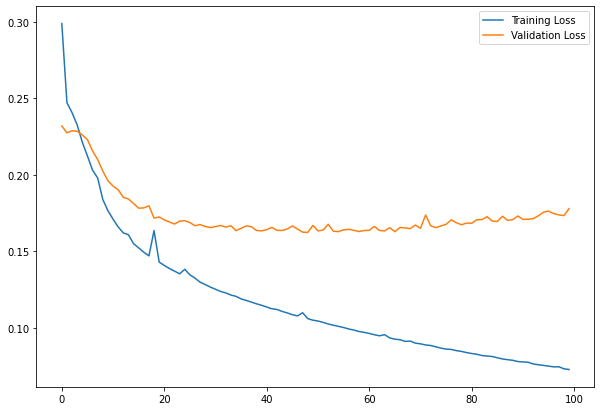

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
a, = plt.plot(history.history['loss'],label='Training Loss')
b, = plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(handles=[a,b])
plt.show()

In [ ]:
# Define encoder model
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
# Define decoder model

# Inputs from the encoder
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))

# Create a combined memory to input into the decoder
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Decoder
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

# Predict next char
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,[decoder_outputs] + decoder_states)

In [ ]:
# Reverse-lookup token index to decode sequences back to something readable.
reverse_input_char_index = {i: char for char, i in input_token_index.items()}
reverse_target_char_index = {i: char for char, i in target_token_index.items()}

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['(']] = 1.
    stop_condition = False
    decoded_sentence = ''
    
    # Loop untill we recieve a stop sign
    while not stop_condition:
        # Get output and internal states of the decoder 
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Get the predicted token 
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # Get the character belonging to the token
        sampled_char = reverse_target_char_index[sampled_token_index]
        # Append char to output
        decoded_sentence += sampled_char
        if (sampled_char == '\n' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.
        states_value = [h, c]

    return decoded_sentence

In [ ]:
for seq_index in range(2):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: ['start', 'one', 'number', 'is', '11', 'more', 'than', 'another', 'number', 'find', 'the', 'two', 'numbers', 'if', 'three', 'times', 'the', 'larger', 'exceeds', 'four', 'times', 'the', 'smaller', 'number', 'by', '4', 'end']
Decoded sentence: :(x-1)+x+(x+1)+(x+2)+(x+2)+(x+3)),equ:x-1+((x-1)+(2*k+1)+(x-3)+(x-4),equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ
-
Input sentence: ['start', 'one', 'number', 'is', '3', 'less', 'than', 'a', 'second', 'number', 'twice', 'the', 'second', 'number', 'is', '12', 'less', 'than', '5', 'times', 'the', 'first', 'find', 'the', 'two', 'numbers.end']
Decoded sentence: :(x-1)+x+(x+1)+(x+2)+(x+2)+(x+3)=434,equ:x>=(x-1)+(x-2),equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,equ:x>0,
